In [1]:
#importar librerías necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [4]:
#importar datos compilados de admisión de UDG
df = pd.read_excel (r'/Users/mariomorales/Documents/ITESO/TOG/modelo_ingreso_udg/datos/datos_udg_admision.xlsx')

In [5]:
#visualización del dataframe
df.head()

,CENTRO,CARRERA,ASPIRANTES,ADMITIDOS,NO_ADMITIDOS,CUPO,PORCENTAJE_ADMISION,PUNTAJE_MINIMO,CALENDARIO
0,CUAAD,LICENCIATURA EN DISENO PARA LA COMUNICACION GR...,812,135,677,135,0.1663,160.0556,2
1,CUAAD,LICENCIATURA EN DISENO DE MODAS,166,40,126,40,0.2410,156.8356,2
2,CUAAD,LICENCIATURA EN DISENO DE INTERIORES Y AMBIENT...,434,60,374,60,0.1382,157.5622,2
3,CUAAD,LICENCIATURA EN URBANISTICA Y MEDIO AMBIENTE,88,50,38,50,0.5682,138.1111,2
4,CUAAD,LICENCIATURA EN ARQUITECTURA,1021,135,886,135,0.1322,167.4011,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790 entries, 0 to 1789
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CENTRO               1790 non-null   object 
 1   CARRERA              1790 non-null   object 
 2   ASPIRANTES           1790 non-null   int64  
 3   ADMITIDOS            1790 non-null   int64  
 4   NO_ADMITIDOS         1790 non-null   int64  
 5   CUPO                 1790 non-null   int64  
 6   PORCENTAJE_ADMISION  1790 non-null   float64
 7   PUNTAJE_MINIMO       1790 non-null   float64
 8   CALENDARIO           1790 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 126.0+ KB


In [7]:
#reemplazar variable de porcentaje de admisión por categoría dicotómica
#probabilidad alta = 1, cuando el % de admisión es mayor al 25%
#probabilidad baja = 0, cuando el % de admisión es menor a 25%
df['PROB_ALTA'] = np.where(df.PORCENTAJE_ADMISION < .25, 0, 1)
df = df.drop(columns = 'PORCENTAJE_ADMISION')

In [8]:
#visualización del nuevo dataframe con la nueva variable de probabilidad
df.head()

,CENTRO,CARRERA,ASPIRANTES,ADMITIDOS,NO_ADMITIDOS,CUPO,PUNTAJE_MINIMO,CALENDARIO,PROB_ALTA
0,CUAAD,LICENCIATURA EN DISENO PARA LA COMUNICACION GR...,812,135,677,135,160.0556,2,0
1,CUAAD,LICENCIATURA EN DISENO DE MODAS,166,40,126,40,156.8356,2,0
2,CUAAD,LICENCIATURA EN DISENO DE INTERIORES Y AMBIENT...,434,60,374,60,157.5622,2,0
3,CUAAD,LICENCIATURA EN URBANISTICA Y MEDIO AMBIENTE,88,50,38,50,138.1111,2,1
4,CUAAD,LICENCIATURA EN ARQUITECTURA,1021,135,886,135,167.4011,2,0


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PROB_ALTA', ylabel='count'>

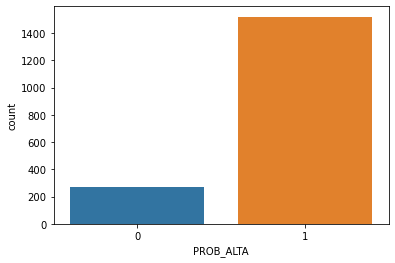

In [9]:
#visualizar cuántas carreras con probabilidad alta y cuántas con probabilidad baja hay en el dataframe
sns.countplot(df['PROB_ALTA'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CALENDARIO', ylabel='count'>

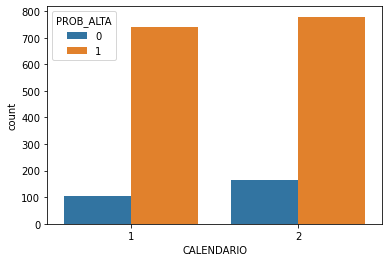

In [10]:
#visualizar cuántas hay de cada una por calendario (calendario A = 1, calendario B = 2)
#Se confirma que en el calendario B hay más carreras con probabilidad baja de ingreso
sns.countplot(df['CALENDARIO'],hue=df['PROB_ALTA'])

In [11]:
#Separar el conjunto de datos en variables dependientes e independientes
feature_cols = ['CALENDARIO','PUNTAJE_MINIMO','CUPO','ADMITIDOS','ASPIRANTES']
X = df[feature_cols]
y = df.PROB_ALTA

In [12]:
#separar los datos en datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [13]:
#llamar la clase de sklearn para crear la clasificación del árbol de decisión
clf = DecisionTreeClassifier()
#hacer el ajuste del modelo
clf = clf.fit(X_train,y_train)
#usar el modelo entrenado para predecir las clases del conjunto de datos de prueba
y_pred = clf.predict(X_test)

In [14]:
#revisar porcentaje de precisión del modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9404096834264432


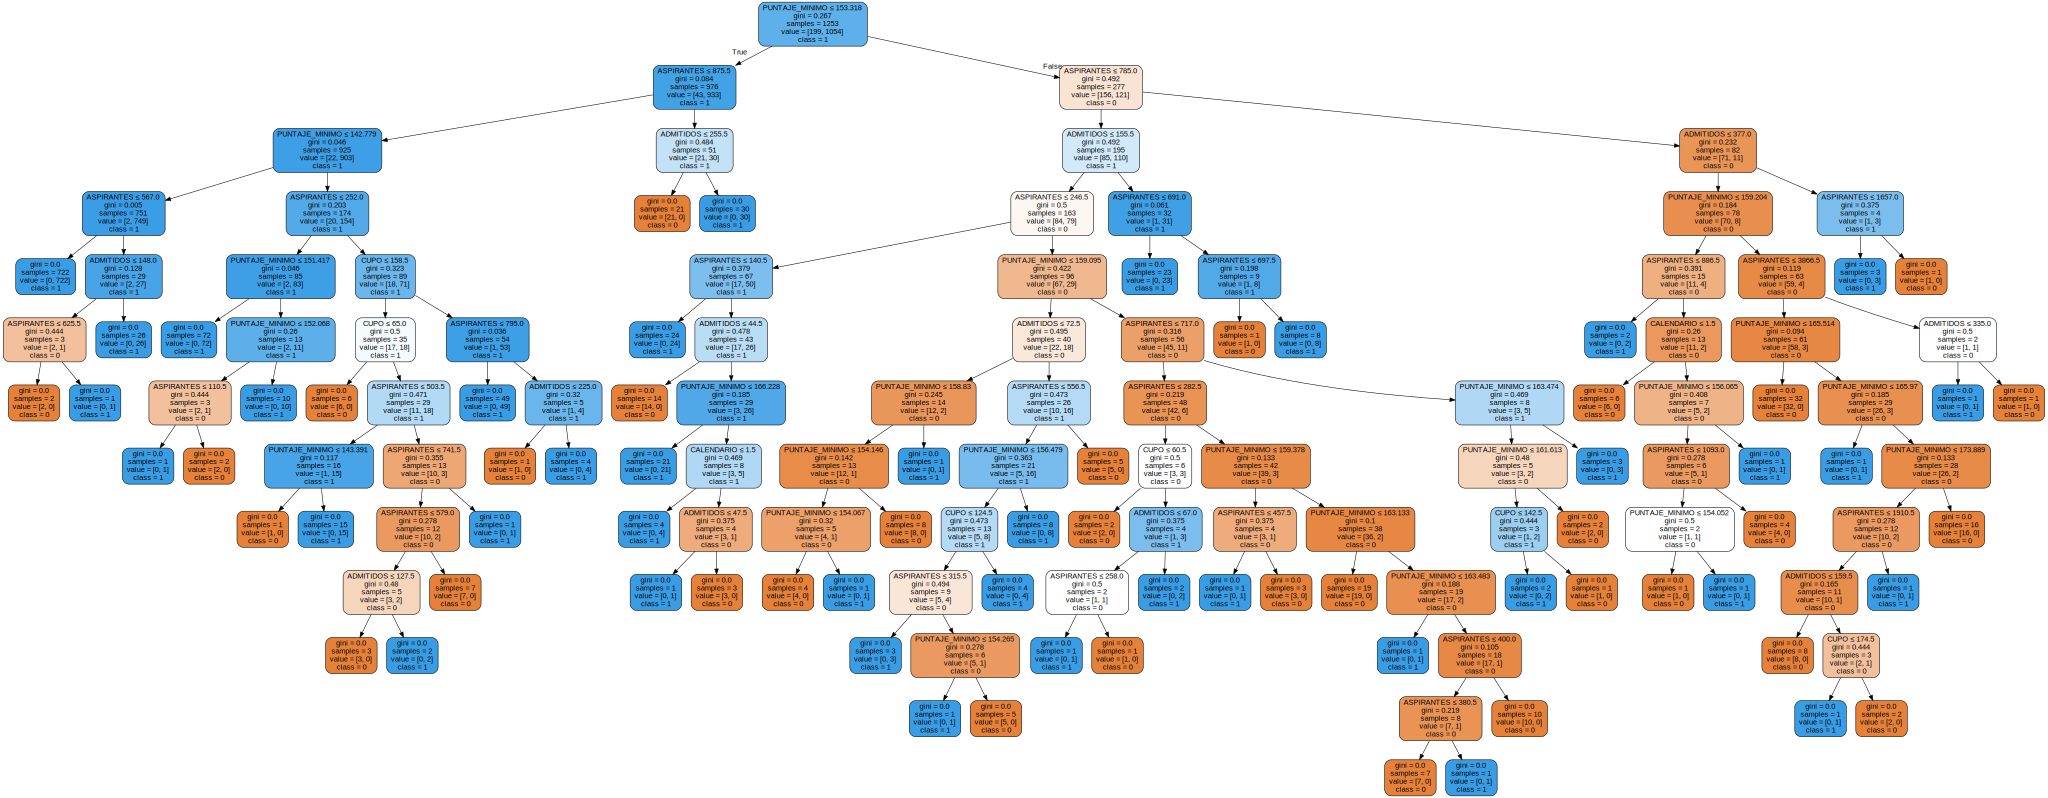

In [15]:
#visualización del árbol
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(clf, out_file=None,
                    feature_names = feature_cols,
                    class_names=['0','1'],
                    filled=True, rounded=True,
                    special_characters=True)

graph = graphviz.Source(dot_data)  
graph

In [16]:
#volvemos a entrenar el modelo con parámetros para reducir el tamaño del árbol
clf = DecisionTreeClassifier(criterion="gini", max_depth=4)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9348230912476723


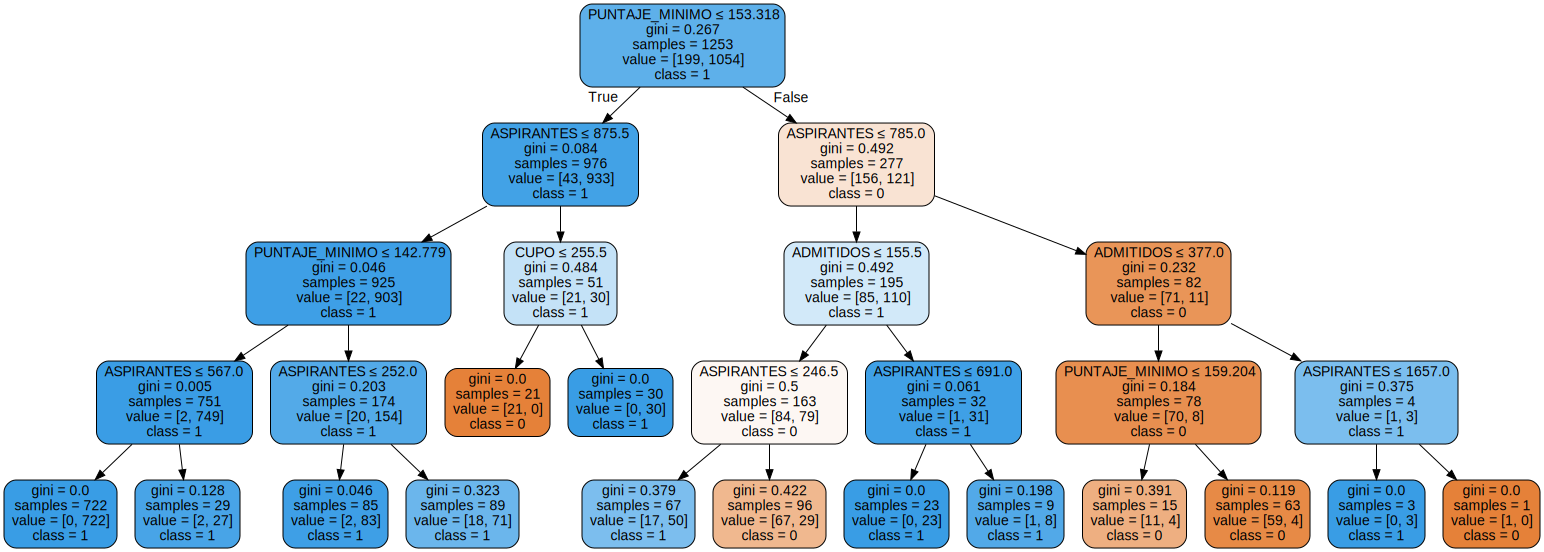

In [17]:
#visualización del nuevo árbol
dot_data = tree.export_graphviz(clf, out_file=None,
                    feature_names = feature_cols,
                    class_names=['0','1'],
                    filled=True, rounded=True,
                    special_characters=True)

graph = graphviz.Source(dot_data)  
graph

In [18]:
#crear un dataframe de prueba para una carrera altamente demandada
medico_cirujano_cucs_2021B = {'CALENDARIO':[2], 'PUNTAJE_MINIMO':[180.41], 'CUPO':[367], 'ADMITIDOS':[367], 'ASPIRANTES':[4403]}
test0_df = pd.DataFrame(medico_cirujano_cucs_2021B)
test0_df.head()

,CALENDARIO,PUNTAJE_MINIMO,CUPO,ADMITIDOS,ASPIRANTES
0,2,180.41,367,367,4403


In [19]:
#probar la predicción de la clase a que pertenece este dataframe
test0_pred = clf.predict(test0_df)
print(test0_pred)

[0]


In [20]:
lic_informatica_cucei_2021B = {'CALENDARIO':[2], 'PUNTAJE_MINIMO':[150.37], 'CUPO':[275], 'ADMITIDOS':[275], 'ASPIRANTES':[703]}
test1_df = pd.DataFrame(lic_informatica_cucei_2021B)
test1_df.head()

,CALENDARIO,PUNTAJE_MINIMO,CUPO,ADMITIDOS,ASPIRANTES
0,2,150.37,275,275,703


In [21]:
test1_pred = clf.predict(test1_df)
print(test1_pred)

[1]
